In [16]:
import geopandas as gpd
import matplotlib
import pandas as pd

In [8]:
Layer1="D:\Roushan\Customer Profiling\Reference_file\SHP\All_india_pincode_region.shp"
Layer2="D:\Roushan\Customer Profiling\Reference_file\SHP\Combined_ESI_Locality_Layer_V11_With_Data _And_Income_20_plus_region.shp"

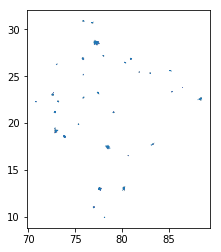

In [11]:
shp_Layer2=gpd.read_file(Layer2)
shp_Layer2.plot()

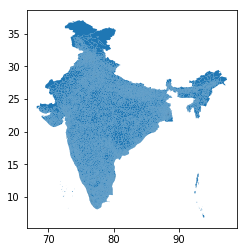

In [10]:
shp_Layer1= gpd.read_file(Layer1)
shp_Layer1.plot()
#shp_Layer1

In [12]:
shp_Layer1.columns

Index(['PIN_CODE', 'NAME', 'CODE', 'STATE_NAME', 'STATE_CODE', 'FEATUREID',
       'geometry'],
      dtype='object')

In [30]:
# Checking the coordinate system
shp_Layer1.crs
#copy shpfile to another variable
shp_Layer1_copy=shp_Layer1.copy()
#Set new coordenate system
shp_Layer1_copy=shp_Layer1_copy.to_crs({'init':'epsg:32645'})

In [31]:
shp_Layer1_copy.columns
shp_Layer1_copy["Area_Sq_m"]=shp_Layer1_copy['geometry'].area
#shp_pincode2.Area_Sq_m

In [ ]:
#Printing area of each object
#for PIN_CODE, row in shp_Layer1.iterrows():
    #poly_area= row['geometry'].area
   # print("Area of pincode: {0} is:{1:.5f}".format(PIN_CODE, poly_area) )


In [32]:
max_area=shp_Layer1_copy['Area_Sq_m'].max()
max_area

86233858926.94147

In [33]:
shp_Layer1_copy[shp_Layer1_copy['Area_Sq_m'] == max_area]

,PIN_CODE,NAME,CODE,STATE_NAME,STATE_CODE,FEATUREID,geometry,Area_Sq_m
19024,193222,POK Area,01,Jammu And Kashmir,01,9908000000019025,POLYGON ((-361530.4581968713 3976632.592492779...,8.623386e+10


In [34]:
shp_Layer2_copy=shp_Layer2.copy()
shp_Layer2_copy=shp_Layer2_copy.to_crs({'init':'epsg:32645'})
shp_Layer2_copy.columns

Index(['COMBINED', 'ID', 'ID0', 'POINT_FLAG', 'CITY_NAME', 'AREA', 'PLCN',
       'FLAG', 'PLCN_FLAG', 'LSI_RAW', 'LATITUDE', 'LONGITUDE', 'FINAL',
       'FLAG_FINAL', 'REMARKS_QC', 'FLAG0', 'LSI_TUNNED', 'HOUSING',
       'AND_FMCG', 'APPAREL', 'TRANSPORT', 'MEDICAL', 'SAVINGS', 'EDUCATION',
       'ENTERTAINM', 'OTHERS', 'geometry'],
      dtype='object')

In [35]:
Overlap_Object= gpd.overlay(shp_Layer1_copy,shp_Layer2_copy,how='intersection')
#Overlap_Object


In [36]:
#checking count of all missing value
Overlap_Object['geometry'].isnull().sum()

0

In [37]:
#Calculating Overlap Area
Overlap_Object['Overlap_Area_Sq_m']=Overlap_Object['geometry'].area

In [38]:
#Checking if overlap area is zero
Overlap_Object[Overlap_Object['Overlap_Area_Sq_m']==0]

,PIN_CODE,NAME,CODE,STATE_NAME,STATE_CODE,FEATUREID,Area_Sq_m,COMBINED,ID,ID0,...,AND_FMCG,APPAREL,TRANSPORT,MEDICAL,SAVINGS,EDUCATION,ENTERTAINM,OTHERS,geometry,Overlap_Area_Sq_m


In [45]:
# Export Overlap output to csv
Overlap_Object.to_csv(r'D:\Roushan\Pincode_ESI_Layer_Overlap.csv',index=False, header=True)